In [27]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import cross_validation as cv, tree
import matplotlib.pyplot as plt
import skimage as skim
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
MONA_PATH = "data/mona_lisa.jpg"

In [3]:
mona = Image.open(MONA_PATH)

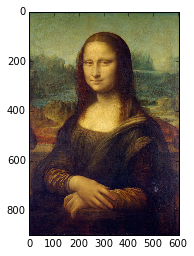

In [4]:
plt.imshow(mona)

In [5]:
# b
width, height = mona.size

TRAIN_COORDINATES = []
while len(TRAIN_COORDINATES) < 5000:
    rand_point = (np.random.randint(width), np.random.randint(height))
    if not rand_point in TRAIN_COORDINATES:
        TRAIN_COORDINATES.append(rand_point)

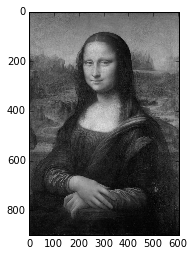

In [6]:
# c
# weighted grayscale converter
def rgb_to_grayscale(R, G, B):
    return R * 0.2989 + G * 0.5870 + B * 0.1140
# built in grayscale conversion
gray_mona = mona.convert('LA')

plt.imshow(gray_mona)

In [7]:
# d
# not necessary
# RESCALED_PIXELS = np.array(POST_PIXELS) / 255

In [8]:
# using our rgb_to_grayscale function
# mona_pixels = mona.load()
# POST_PIXELS = []
# for pixel in TRAIN_COORDINATES:
#     r, g, b = mona_pixels[pixel[0], pixel[1]]
#     POST_PIXELS.append(rgb_to_grayscale(r, g, b))

In [9]:
mona_pixels_gray = gray_mona.load()
POST_PIXELS = []
for pixel in TRAIN_COORDINATES:
    grayscale, pixel_range = mona_pixels_gray[pixel[0], pixel[1]]
    POST_PIXELS.append(grayscale)

In [11]:
TEST = [(y, x) for x in range(height) for y in range(width)]

In [10]:
def rand_forest(num_trees, depth):    
    rf = RF(n_estimators=num_trees, max_depth=depth)
    rf.fit(TRAIN_COORDINATES, POST_PIXELS)
    prediction = rf.predict(TEST)
    a = np.array(prediction).reshape(height, width)
    print num_trees, " decision trees with max depth ", depth
    plt.imshow(a, cmap="gray")
    plt.show()

10  decision trees with max depth  None


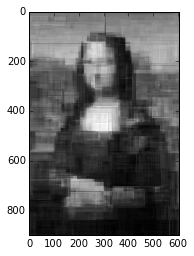

In [12]:
rand_forest(10, None)

1  decision trees with max depth  1


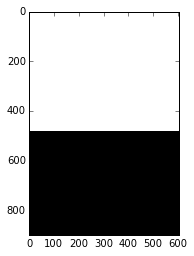

1  decision trees with max depth  2


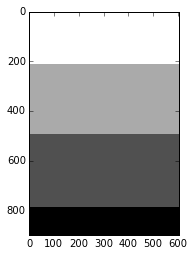

1  decision trees with max depth  3


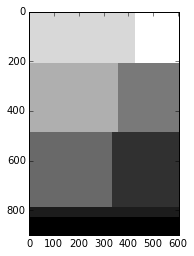

1  decision trees with max depth  5


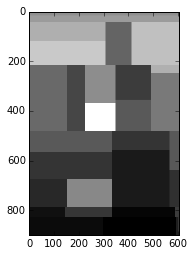

1  decision trees with max depth  10


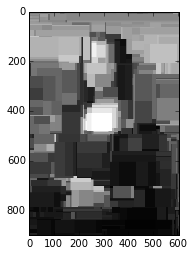

1  decision trees with max depth  15


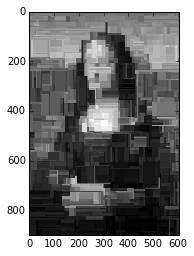

In [13]:
max_depths = [1,2,3,5,10,15]
for max_depth in max_depths:
    rand_forest(1, max_depth)

1  decision trees with max depth  7


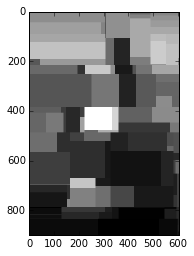

3  decision trees with max depth  7


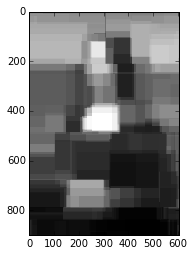

5  decision trees with max depth  7


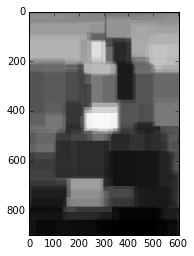

10  decision trees with max depth  7


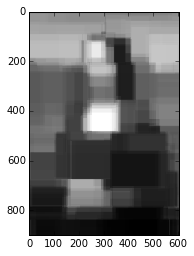

100  decision trees with max depth  7


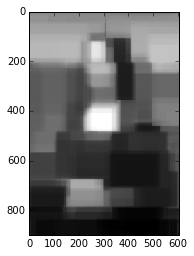

In [14]:
num_trees = [1, 3, 5, 10, 100]
for num_tree in num_trees:
    rand_forest(num_tree, 7)

In [15]:
knn = KNN(n_neighbors=1)
knn.fit(TRAIN_COORDINATES, POST_PIXELS)
prediction_knn = knn.predict(TEST)

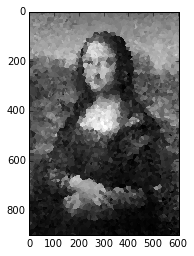

In [16]:
a = np.array(prediction_knn).reshape(height, width)
plt.imshow(a, cmap="gray")

10  decision trees with max depth  15


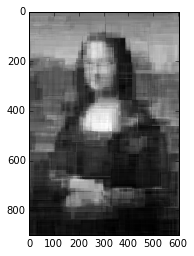

In [17]:
rand_forest(10, 15)

100  decision trees with max depth  None


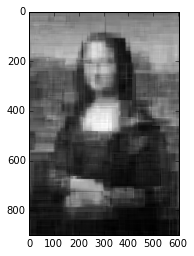

In [18]:
rand_forest(100, None)

In [19]:
# cross validation, k = 10 for pruning
prune_trees = [10, 25, 50, 100, 1000]
prune_depth = [10, 25, 50, 100, None]
best_accuracy = -1
best_prune = (-1, -1)

for tree in prune_trees:
    for depth in prune_depth:
        rf = RF(n_estimators=tree, max_depth=depth)
        score = cv.cross_val_score(rf, TRAIN_COORDINATES, POST_PIXELS, cv=10).mean()
        print (tree, depth), score
        if score > best_accuracy:
            best_accuracy = score
            best_prune = (tree, depth)

print "Highest Consistent Accuracy: {0} with {1}".format(best_accuracy, best_prune)

(10, 10) 0.887160910536
(10, 25) 0.890816771899
(10, 50) 0.889693325274
(10, 100) 0.893926219671
(10, None) 0.891423872992
(25, 10) 0.889166794257
(25, 25) 0.896862889114
(25, 50) 0.897257352236
(25, 100) 0.896218094977
(25, None) 0.896756092517
(50, 10) 0.890353732608
(50, 25) 0.898434177622
(50, 50) 0.899404058748
(50, 100) 0.898601673202
(50, None) 0.89838089977
(100, 10) 0.891454055
(100, 25) 0.900734208497
(100, 50) 0.900246082354
(100, 100) 0.899953511381
(100, None) 0.899830486135
(1000, 10) 0.892431850781
(1000, 25) 0.900807644127
(1000, 50) 0.900796671869
(1000, 100) 0.901176819381
(1000, None) 0.900918584351
Highest Consistent Accuracy: 0.901176819381 with (1000, 100)


In [31]:
# saving random decision tree
rf = RF(n_estimators=100, max_depth=None)
rf.fit(TRAIN_COORDINATES, POST_PIXELS)
with open('decision_tree.dot', 'w') as my_file:
    my_file = tree.export_graphviz(rf.estimators_[0], out_file = my_file)